In [ ]:
import  os
import  numpy as np
import  pandas  as pd
%matplotlib inline
import  matplotlib.pyplot as plt
import gzip


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. Загрузка дата сета


---




In [ ]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    labels_path = os.path.join(path,
                               f'{kind}-labels-idx1-ubyte.gz')
    images_path = os.path.join(path,
                               f'{kind}-images-idx3-ubyte.gz')

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 28, 28)
    
    return images, labels

In [ ]:
test_img_path = "/content/drive/My Drive/ML/lab7-8/t10k-images-idx3-ubyte.gz"
test_label_path = "/content/drive/My Drive/ML/lab7-8/t10k-labels-idx1-ubyte.gz"
train_img_path =  "/content/drive/My Drive/ML/lab7-8/train-images-idx3-ubyte.gz"
train_label_path = "/content/drive/My Drive/ML/lab7-8/train-labels-idx1-ubyte.gz"

path = '/content/drive/My Drive/ML/lab7-8/'
X_train, Y_train = load_mnist(path, kind='train')
X_test, Y_test = load_mnist(path, kind='t10k')
# X_test = readLabels(test_img_path)
# Y_test = readLabels(test_label_path)
# X_train = readLabels(train_img_path)
# Y_train = readLabels(train_label_path)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

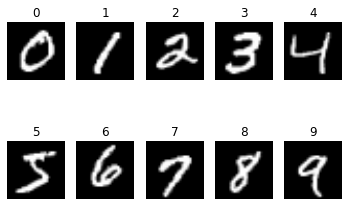

In [ ]:

labels = [0,1,2,3,4,5,6,7,8,9]

for i, label in enumerate(labels):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[np.min(np.where(Y_train == i))], 
               cmap='gray', 
               interpolation='bilinear')
    plt.title(label)
    plt.axis('off')

# 2. Построение нейронной сети

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
input_shape = (28, 28, 1)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
n_classes = 10

Y_train = np_utils.to_categorical(Y_train, n_classes)
Y_test = np_utils.to_categorical(Y_test, n_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

# 3. Обучение и построение метрик ошибки

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, 
              metrics =["accuracy"])

In [ ]:
early_stopping_monitor = EarlyStopping(patience=3)

In [ ]:
model_train = model.fit(X_train, Y_train,
                        batch_size=128, 
                        epochs=3,
                        callbacks=[early_stopping_monitor],
                        validation_data=(X_test, Y_test))

Epoch 1/3
469/469 [==============================] - 50s 92ms/step - loss: 0.2999 - accuracy: 0.9008 - val_loss: 0.0344 - val_accuracy: 0.9884
Epoch 2/3
469/469 [==============================] - 42s 90ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 3/3
469/469 [==============================] - 42s 90ms/step - loss: 0.0261 - accuracy: 0.9916 - val_loss: 0.0421 - val_accuracy: 0.9875


In [ ]:
model_train.history

{'accuracy': [0.9578166604042053, 0.9864333271980286, 0.9917166829109192],
 'loss': [0.13365347683429718, 0.042712002992630005, 0.02593539096415043],
 'val_accuracy': [0.9883999824523926, 0.9905999898910522, 0.987500011920929],
 'val_loss': [0.034369904547929764, 0.02982674166560173, 0.04208217188715935]}

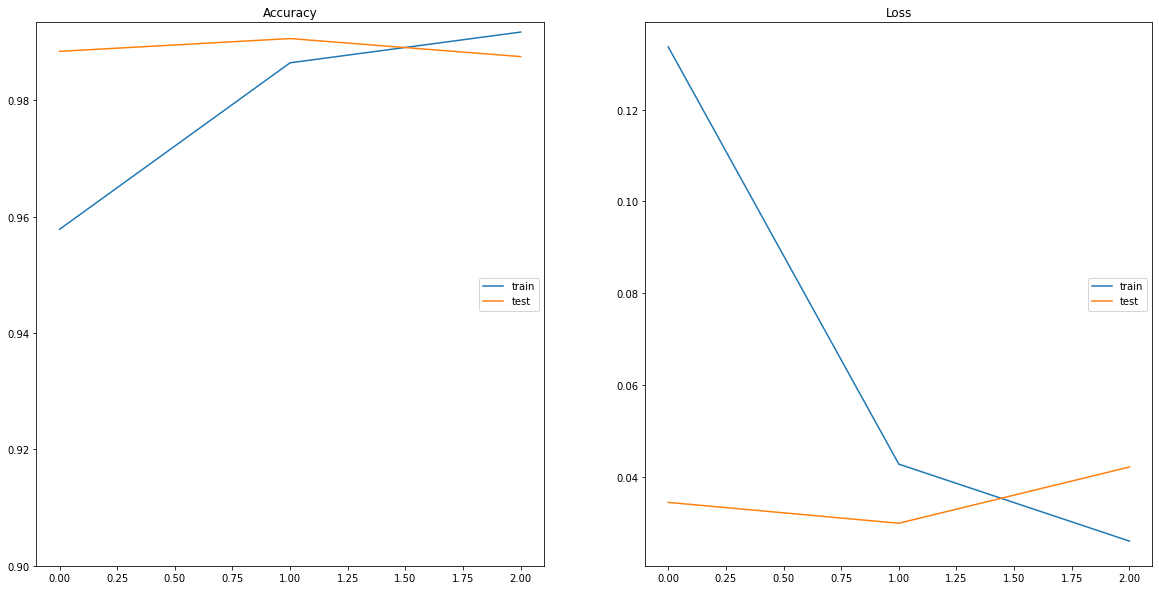

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(model_train.history['accuracy'], label='train')
plt.plot(model_train.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend(loc='center right')
plt.ylim(0.9, )

plt.subplot(1, 2, 2)
plt.plot(model_train.history['loss'], label='train')
plt.plot(model_train.history['val_loss'], label='test')
plt.title('Loss')
plt.legend(loc='center right');

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.042082175612449646
Test accuracy: 0.987500011920929


In [ ]:
Y_pred = model.predict_classes(X_test, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
testing_labels = []
for lbl in Y_test:
  for i, val in enumerate(lbl):
    if val == 1:
      testing_labels.append(i)

Max_deviation:  9.0
Min_deviation:  0.0
Arithmetic_mean:  0.0461
MAE:  0.0461
RMSE:  0.2247
R^2:  0.9732027744838379


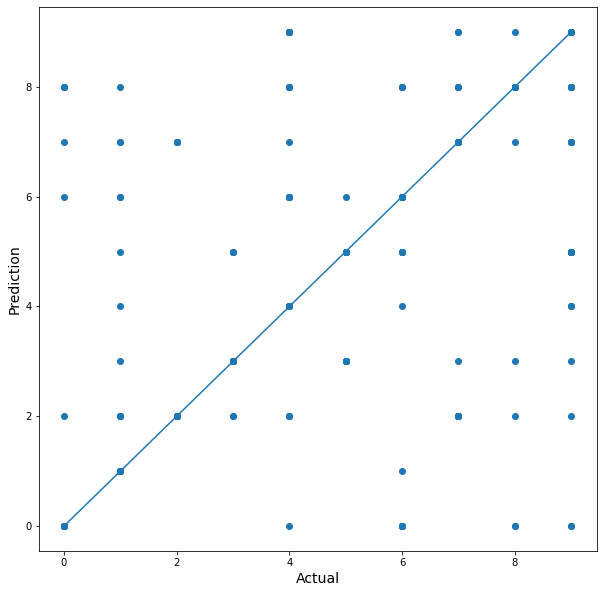

In [ ]:
def check_error(Y_pred, Y_test):
  sum = 0.0
  max_deviation = 0
  min_deviation = 10**10

  for i, elem in enumerate(Y_test):
    sum += math.fabs(Y_pred[i]-elem)
    if math.fabs(Y_pred[i]-elem) > max_deviation:
      max_deviation = math.fabs(Y_pred[i]-elem)
    if math.fabs(Y_pred[i] - elem) < min_deviation:
      min_deviation = math.fabs(Y_pred[i]-elem)

  print("Max_deviation: ", max_deviation)
  print("Min_deviation: ", min_deviation)
  print("Arithmetic_mean: ", sum/len(Y_pred))
  print("MAE: ", mean_absolute_error(Y_test, Y_pred))
  print("RMSE: ", mean_squared_error(Y_test, Y_pred))
  print("R^2: ", r2_score(Y_test, Y_pred))
  plt.figure(figsize=(10, 10))
  plt.scatter(Y_test, Y_pred)
  plt.plot([0, max(Y_test)], [0, max(Y_pred)])
  plt.xlabel('Actual', fontsize=14)
  plt.ylabel('Prediction', fontsize=14)

check_error(Y_pred, testing_labels)